# Fernando Jimenez Pereyra
    A01734609

In [28]:
# !pip install pandas numpy matplotlib dataprep sklearn
# !pip install tensorflow-gpu

In [29]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)

In [30]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [31]:
print('Tensorflow: ', tf.__version__)

Tensorflow:  2.10.0


In [32]:
df = pd.read_csv('./clean_fish.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,onehotencoder__x0_Bream,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,Weight,Length1,Height,Width
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,242.0,23.2,11.5200,4.0200
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,290.0,24.0,12.4800,4.3056
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,23.9,12.3778,4.6961
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,363.0,26.3,12.7300,4.4555
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,430.0,26.5,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...
154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,11.5,2.0904,1.3936
155,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.4,11.7,2.4300,1.2690
156,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.2,12.1,2.2770,1.2558
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,19.7,13.2,2.8728,2.0672


In [33]:
train, test = train_test_split(df, test_size=0.33)

In [34]:
y_train = train['Weight']
y_test = test['Weight']
x_train = train.drop(columns=['Weight'])
x_test = test.drop(columns=['Weight'])

In [35]:
test_results = {}

In [36]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

In [37]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [38]:
normalizer.adapt(np.array(x_train))

In [39]:
print(normalizer.mean.numpy())

[[ 0.179  0.057  0.358  0.132  0.123  0.104  0.047 25.8    8.411  4.27 ]]


In [40]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [41]:
x_train[:10]

,onehotencoder__x0_Bream,onehotencoder__x0_Parkki,onehotencoder__x0_Perch,onehotencoder__x0_Pike,onehotencoder__x0_Roach,onehotencoder__x0_Smelt,onehotencoder__x0_Whitefish,Length1,Height,Width
73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.5,3.5280,1.9992
16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4,14.8604,5.2854
141,0.0,0.0,0.0,1.0,0.0,0.0,0.0,52.0,10.6863,6.9849
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,27.6,12.6700,4.6900
124,0.0,0.0,1.0,0.0,0.0,0.0,0.0,39.8,11.9328,7.2772
138,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.2,7.7920,4.8700
157,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.2,2.8728,2.0672
55,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.6,8.3804,4.2476
83,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0,5.9175,3.3075
43,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.4,5.8045,3.7544


In [42]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
%%time
history = linear_model.fit(
    x_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 1.78 s, sys: 154 ms, total: 1.93 s
Wall time: 1.73 s


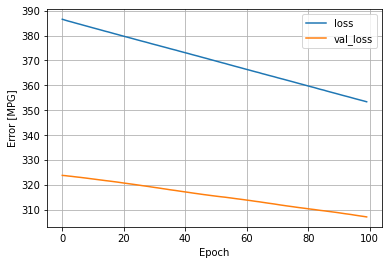

In [44]:
plot_loss(history)

In [45]:
test_results['linear_model'] = linear_model.evaluate(
    x_test, y_test, verbose=0)

Neural network

In [46]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [47]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 10)               21        
 ion)                                                            
                                                                 
 dense_5 (Dense)             (None, 64)                704       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,950
Trainable params: 4,929
Non-trainable params: 21
_________________________________________________________________


In [48]:
%%time
history = dnn_model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 1.91 s, sys: 205 ms, total: 2.12 s
Wall time: 1.83 s


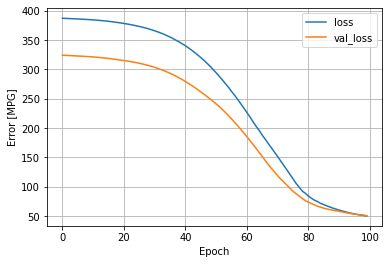

In [49]:
plot_loss(history)

In [50]:
test_results['dnn_model'] = dnn_model.evaluate(x_test, y_test, verbose=0)

In [54]:
test_results

{'linear_model': 415.5180969238281, 'dnn_model': 64.96604919433594}

2/2 [==============================] - 0s 1ms/step


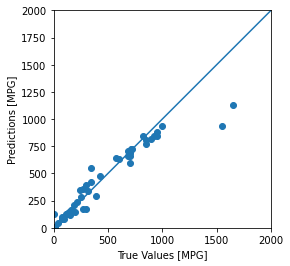

In [52]:
test_predictions = dnn_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 2000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

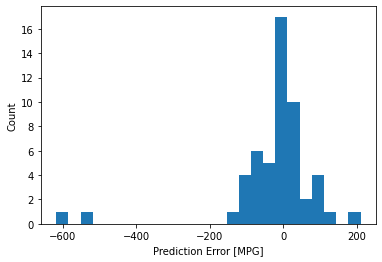

In [53]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')